#📌 Extracción

In [2]:
import json
import pandas as pd

# Cargar archivo JSON
with open('TelecomX_Data.json', encoding='utf-8') as f:
    data = json.load(f)

# Normalizar los datos anidados
df = pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [3]:
# Revisar estructura
df.info()

# Convertir columnas numéricas
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Eliminar columnas irrelevantes si es necesario (por ejemplo, IDs)
# df.drop(columns=['customerID'], inplace=True)

# Ver valores nulos
print(df.isnull().sum())

# Eliminar filas con 'Churn' vacío (registro incompleto)
df = df[df['Churn'].isin(['Yes', 'No'])]

# Resetear índice
df.reset_index(drop=True, inplace=True)

# Verificar duplicados
df = df.drop_duplicates()

# Revisar valores únicos por columna categórica
# print(df['internet.InternetService'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#📊 Carga y análisis

Churn Rate (%):
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


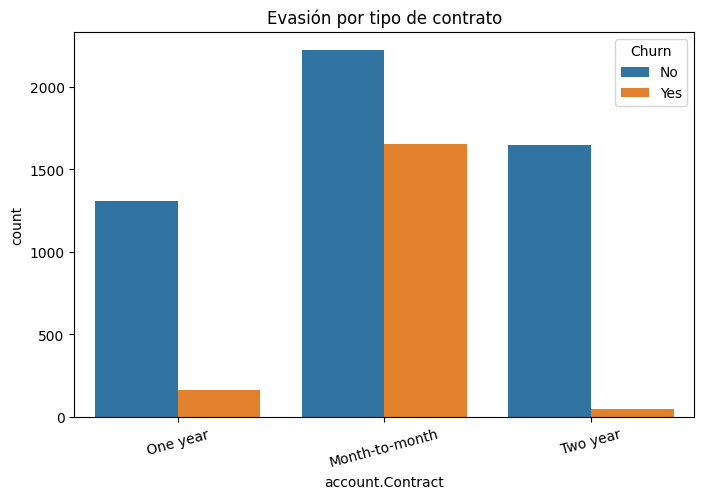

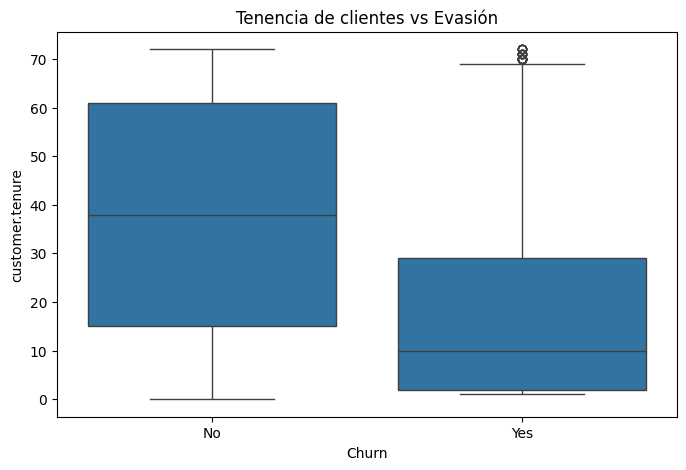

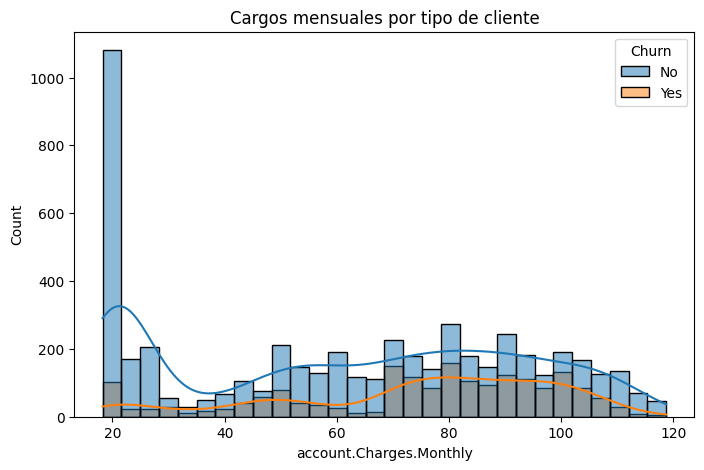

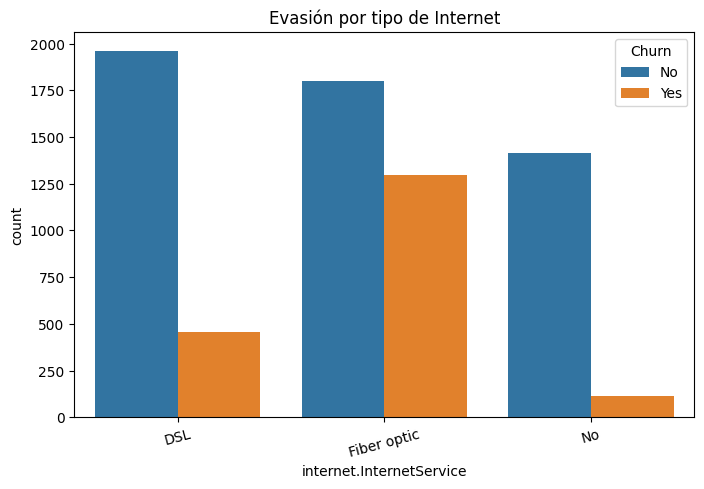

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# % de evasión general
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):\n", churn_rate)

# Gráfico: Churn por tipo de contrato
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='account.Contract', hue='Churn')
plt.title('Evasión por tipo de contrato')
plt.xticks(rotation=15)
plt.show()

# Distribución de tenure por churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='customer.tenure')
plt.title('Tenencia de clientes vs Evasión')
plt.show()

# Distribución de cargos mensuales
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='account.Charges.Monthly', hue='Churn', bins=30, kde=True)
plt.title('Cargos mensuales por tipo de cliente')
plt.show()

# Evasión por tipo de internet
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='internet.InternetService', hue='Churn')
plt.title('Evasión por tipo de Internet')
plt.xticks(rotation=15)
plt.show()


#📄Informe final

# Informe Final

## 1. Introducción
Este análisis tiene como objetivo identificar patrones asociados a la evasión de clientes en la empresa Telecom X. Se utilizaron técnicas de limpieza, transformación y análisis exploratorio de datos.

## 2. Limpieza de datos
- Se eliminaron registros con valores nulos o inválidos en la columna "Churn".
- Se convirtieron los campos de cargos a formato numérico.
- Se eliminaron duplicados.

## 3. Hallazgos clave

- Contrato mensual es el más propenso a la evasión (~42% de churn).
- Clientes con menos de 12 meses de permanencia tienen una tasa más alta de churn.
- El servicio de internet de fibra óptica está más asociado a la evasión comparado con DSL o sin internet.
- Métodos de pago como "Electronic check" tienen más churn que otros.

## 4. Recomendaciones
- Incentivar contratos anuales o de dos años con descuentos o beneficios.
- Analizar la experiencia de clientes nuevos (menor a 12 meses).
- Investigar más a fondo los problemas en clientes con servicio de fibra óptica.
- Cambiar el enfoque de facturación electrónica hacia opciones más confiables o acompañadas de asistencia.
